# **Customer Churn Prediction & Retention Strategy for a Telecom Company**

### **Project Author: Syed Moin Uddin**

---

## **1. The Business Problem**

For any subscription-based business, such as a telecom company, customer retention is the key to long-term success. Acquiring a new customer is often 5 to 25 times more expensive than retaining an existing one. Therefore, losing customers—an event known as **"churn"**—is a major business problem.

The goal of this project is to go beyond simply identifying if a customer will leave. We aim to understand the **reasons behind customer churn**. By analyzing customer data, we can identify the key drivers and predict which customers are at the highest risk of churning.

This allows the business to move from being reactive (losing a customer and not knowing why) to being **proactive**. With these insights, the company can develop targeted retention strategies, such as offering a special discount to an at-risk customer or improving a service that is causing frustration.

---

## **2. The Data**

The dataset we will be using is the popular **IBM Telco Customer Churn** dataset. It contains data from a fictional telecom company that provides home phone and Internet services to 7,043 customers in California.

Each row represents a unique customer, and the columns contain information about them, including:

*   **Customer Demographics:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`.
*   **Services Subscribed:** `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, etc.
*   **Account Information:** `tenure` (how many months they've been a customer), `Contract`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`.
*   **The Target Variable:** `Churn`. This is the column we want to predict. It tells us whether the customer left the company within the last month ("Yes") or stayed ("No").

---

## **3. Our Step-by-Step Plan**

To achieve our goal, we will follow a structured machine learning workflow. This ensures our analysis is thorough and our results are reliable.

1.  **Initial Data Exploration & Cleaning:** We will start by loading the data, understanding its structure, and cleaning it up to make it ready for analysis.
2.  **Exploratory Data Analysis (EDA):** This is the storytelling part. We will create charts and graphs to uncover patterns and answer key business questions about what drives churn.
3.  **Data Preprocessing & Feature Engineering:** We will transform our data into a format that a machine learning model can understand.
4.  **Model Building & Evaluation:** We will train several classification models to predict churn and evaluate them to see which one performs the best. We'll start with a simple model and move to more complex ones.
5.  **Hyperparameter Tuning:** We will take our best-performing model and fine-tune its settings to achieve the highest possible accuracy.
6.  **Conclusion & Business Recommendations:** Finally, we will summarize our findings and provide actionable recommendations that the telecom company can use to reduce customer churn.

## **Part 1: Initial Data Exploration & Cleaning**

### **Step 1.1: Loading Libraries and Data**

First things first, we need to import the essential Python libraries that we will use throughout this project. This is like preparing our toolkit. We will also load our dataset from the CSV file into a pandas DataFrame, which is essentially a smart table that makes it easy to work with data.

In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some visual styles for our charts
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Load the dataset from the CSV file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### **Step 1.2: First Look at the Data**

Let's display the first 5 rows of our dataset. This helps us get a quick snapshot of the data, see the column names, and understand the type of information each column holds (e.g., text, numbers).

In [2]:
# Display the first 5 rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Step 1.3: Understanding the Data Structure**

Now, let's get a technical summary of our dataset. We'll use the `.info()` method, which provides key information at a glance:

*   **Number of Entries:** How many rows (customers) we have in total.
*   **Number of Columns:** How many features we have for each customer.
*   **Column Names:** The name of each feature.
*   **Non-Null Count:** How many rows have a value for that column. If this number is less than the total number of entries, it means we have missing data.
*   **Dtype:** The data type of each column (e.g., `object` usually means text, `int64` means integer, `float64` means a number with decimals).

In [3]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Step 1.4: Cleaning the `TotalCharges` Column**

As we suspected, `TotalCharges` should be a numeric column, but it's currently stored as text (`object`). This is likely because some new customers (with a tenure of 0 months) might not have any total charges yet, and their value might be an empty space.

We will perform the following cleaning steps:
1.  Convert the `TotalCharges` column to a numeric data type. We will tell pandas to turn any values it can't convert (like an empty space) into a `NaN` (Not a Number) value, which represents missing data.
2.  Instead of deleting these rows and losing valuable customer data, we will **impute** (fill) the missing values.
3.  We will use the **median** of the `TotalCharges` column for this. The median is a great choice because it represents the middle value of the data and is not easily skewed by a few customers with extremely high charges (outliers), making it a safer and more representative fill value than the average (mean).

In [4]:
# Convert 'TotalCharges' to a numeric type. `errors='coerce'` will turn any non-numeric values into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many rows have missing TotalCharges
print(f"Number of rows with missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Calculate the median of the 'TotalCharges' column
median_total_charges = df['TotalCharges'].median()

# Fill the missing values with the median
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Confirm that there are no more missing values
print(f"Number of rows with missing TotalCharges after imputation: {df['TotalCharges'].isnull().sum()}")

# Now let's check the info again to confirm our changes
print("\nDataframe info after cleaning:")
df.info()

Number of rows with missing TotalCharges: 11
Number of rows with missing TotalCharges after imputation: 0

Dataframe info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14

C:\Users\User\AppData\Local\Temp\ipykernel_2288\978742852.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


### **Step 1.5: Statistical Summary of Numerical Features**

Now that our data is clean, let's look at the descriptive statistics for all the numerical columns using the `.describe()` method. This gives us a great overview of the distribution of our data.

*   **count:** The number of entries.
*   **mean:** The average value.
*   **std:** The standard deviation, which measures how spread out the data is.
*   **min:** The minimum value.
*   **25%, 50%, 75%:** These are the percentiles, which tell us about the data distribution. The 50% percentile is the same as the median.
*   **max:** The maximum value.

In [5]:
# Get descriptive statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## **Part 2: Exploratory Data Analysis (EDA)**

In this section, we will explore the data visually to uncover insights. Our main goal is to understand the characteristics of customers who churn versus those who don't. Each chart will help us answer a specific business question.

### **Step 2.1: How Many Customers are Churning?**

First, let's look at our most important column: `Churn`. We need to understand the balance between customers who stayed and customers who left. This is our starting point. A pie chart is a great way to show proportions clearly.

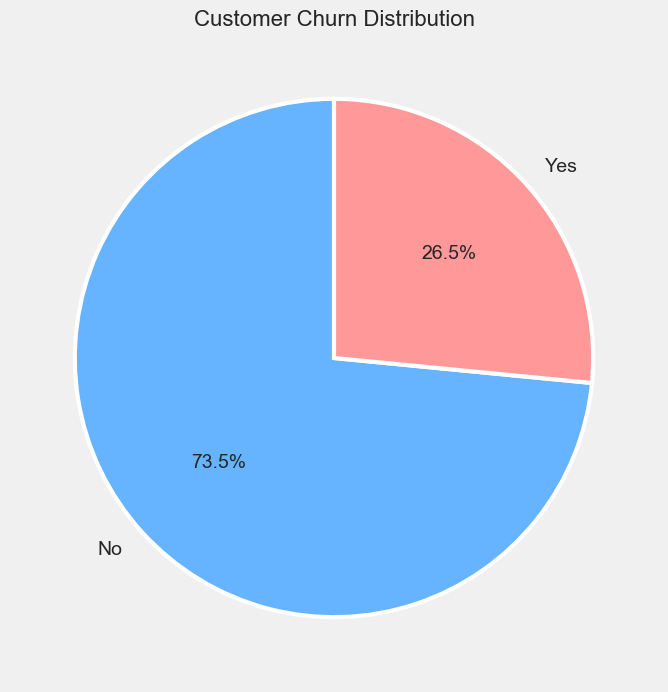

In [6]:
# Calculate the churn distribution
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'],
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Customer Churn Distribution', fontsize=16)
plt.ylabel('') # Hides the 'Churn' label on the side of the pie chart
plt.show()

#### **Insight:**
The chart above shows that **26.5%** of customers in our dataset have churned. This is a significant number for any business. Our goal now is to figure out *why* this group of customers decided to leave.

### **Step 2.2: Does the Contract Type Affect Churn?**

A customer's contract type often reflects their level of commitment to the service. We can hypothesize that customers with shorter contracts might be more likely to leave. Let's create a chart to see if this is true.

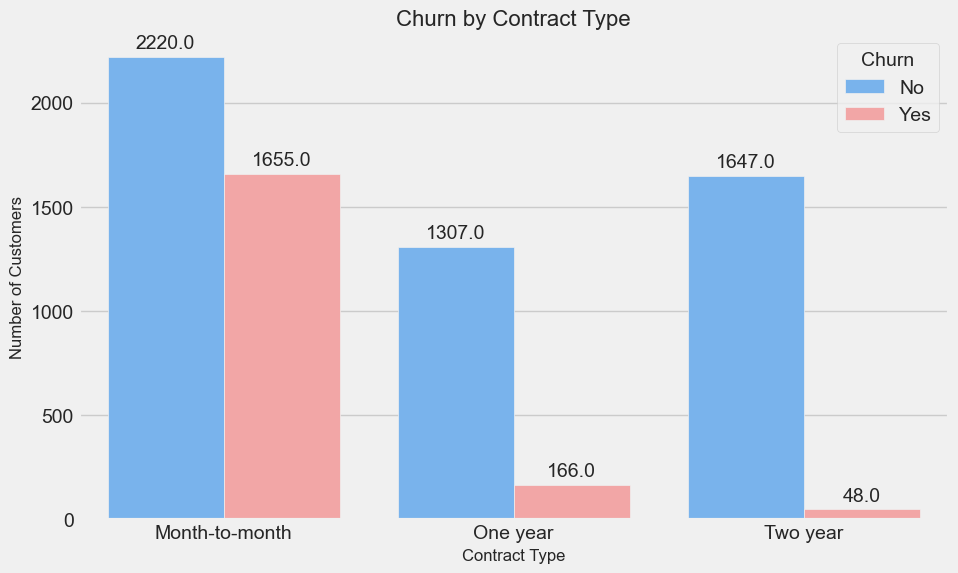

In [7]:
plt.figure(figsize=(10, 6))
# Use seaborn's countplot to create a bar chart
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette=['#66b3ff','#ff9999'])

plt.title('Churn by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add annotations to the bars
for p in ax.patches:
    # We add a condition to only annotate bars with a height greater than 0
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### **Insight:**
This chart reveals a powerful insight. **Customers with Month-to-Month contracts churn at a dramatically higher rate** than customers with One or Two-Year contracts. The long-term contracts provide stability, while the short-term ones are where the business is losing the most customers. This is a major area for the business to focus on.

### **Step 2.3: How Does Internet Service Relate to Churn?**

Internet service is a core product for a telecom company. Is a particular type of internet service causing more customers to leave? Or perhaps customers with no internet service are more loyal? Let's visualize this relationship.

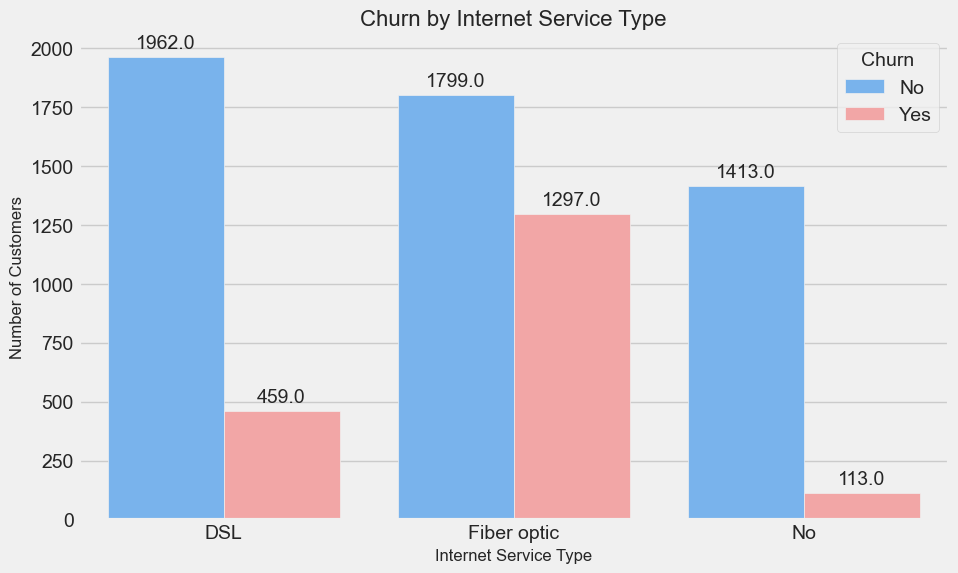

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette=['#66b3ff','#ff9999'])

plt.title('Churn by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add annotations
for p in ax.patches:
    # We add the same condition here
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### **Insight:**
Another very strong pattern emerges. **Customers with Fiber optic internet churn far more often** than those with DSL. While Fiber optic is a premium service, this high churn rate could suggest issues with pricing, reliability, or customer support for that specific service. Customers with no internet service rarely churn.

### **Step 2.4: The Impact of Customer Tenure (Loyalty)**

`tenure` represents the number of months a customer has been with the company. It's a direct measure of customer loyalty. Let's see how the distribution of tenure differs for customers who churned versus those who stayed. A histogram is perfect for this.

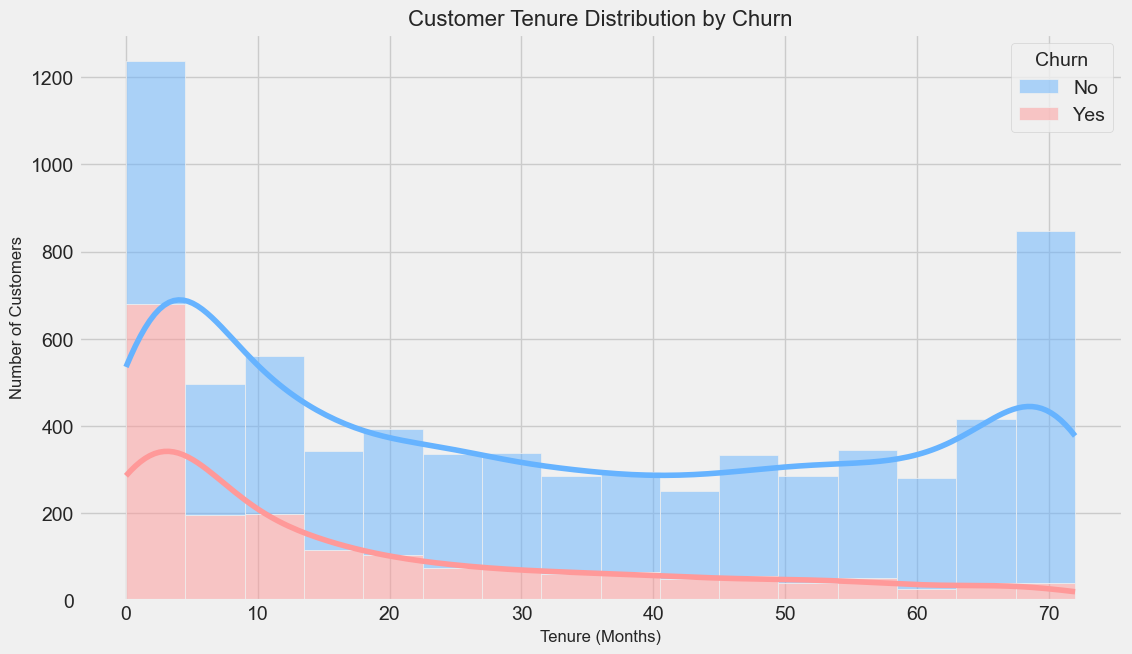

In [9]:
plt.figure(figsize=(12, 7))
# We will create two histograms on the same plot to compare them
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette=['#66b3ff','#ff9999'], kde=True)

plt.title('Customer Tenure Distribution by Churn', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

#### **Insight:**
The chart clearly shows two opposing trends. **A vast majority of customers who churn do so in the very early months**, especially within the first year. Conversely, customers who stay with the company for a long time (`tenure` > 60 months) are extremely loyal and very unlikely to leave. This highlights the importance of the customer onboarding experience and the first few months of service.

### **Step 2.5: Analyzing Monthly Charges and Churn**

Price is often a major factor in a customer's decision to stay or leave. Are customers who churn paying more on average? A violin plot is an excellent way to visualize this. It's like a box plot but also shows the density of the data, giving us a richer view of the distribution.

Think of the plot this way:
*   The **white dot** in the middle is the median (the middle value).
*   The **thick black bar** is the interquartile range (where the middle 50% of customers fall).
*   The **width of the shape** shows how many customers have that specific monthly charge. A wider section means more customers.

C:\Users\User\AppData\Local\Temp\ipykernel_2288\1718154280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette=['#66b3ff','#ff9999'])


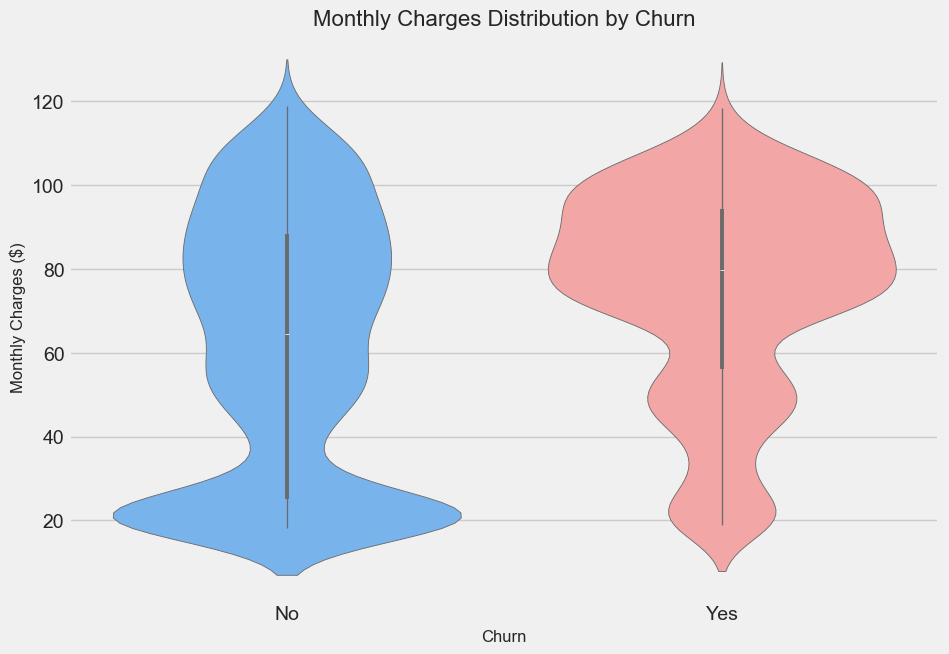

In [10]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette=['#66b3ff','#ff9999'])

plt.title('Monthly Charges Distribution by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.show()

#### **Insight:**
The violin plot reveals a clear trend. The shape for "Yes" (customers who churned) is noticeably wider and centered higher than the shape for "No". This tells us that **customers who churn tend to have higher monthly charges**. The median charge for churners is significantly higher than for non-churners, suggesting that price sensitivity is a key factor.

### **Step 2.6: Does Having Tech Support Help Retain Customers?**

When customers face technical issues, having access to good support can make all the difference. Let's investigate if the presence of a `TechSupport` service has a strong relationship with customer loyalty.

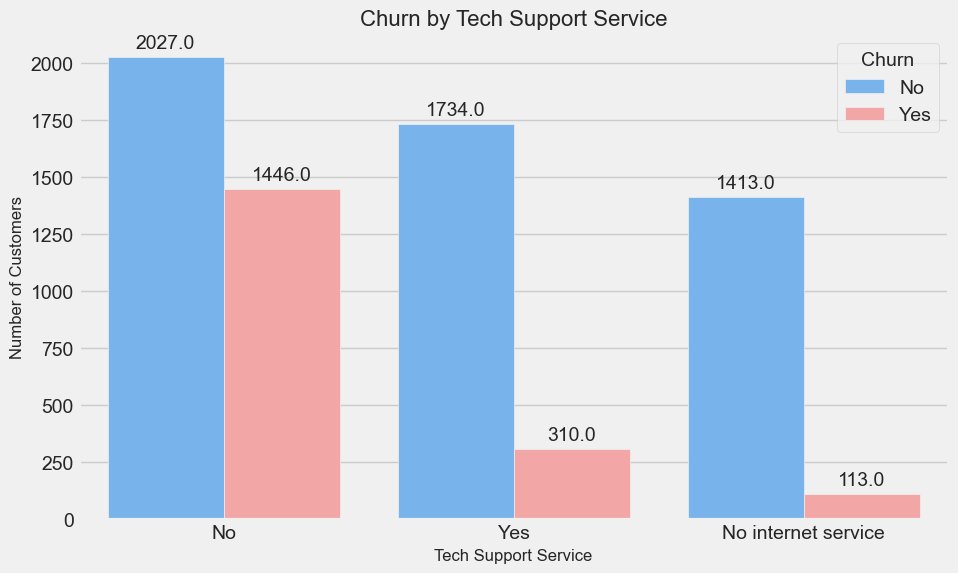

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='TechSupport', hue='Churn', data=df, palette=['#66b3ff','#ff9999'])

plt.title('Churn by Tech Support Service', fontsize=16)
plt.xlabel('Tech Support Service', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add annotations
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### **Insight:**
The result is striking. **Customers who do not have Tech Support churn at a very high rate.** In contrast, customers who are subscribed to the Tech Support service are significantly more loyal. This strongly suggests that a lack of accessible support for technical problems is a major driver of customer frustration and, ultimately, churn.

### **Step 2.7: Payment Method and its Connection to Churn**

Can the way a customer pays their bill influence their likelihood to churn? Some payment methods are more "set-and-forget" (like automatic bank transfers), while others require manual action each month. Let's see if there's a connection.

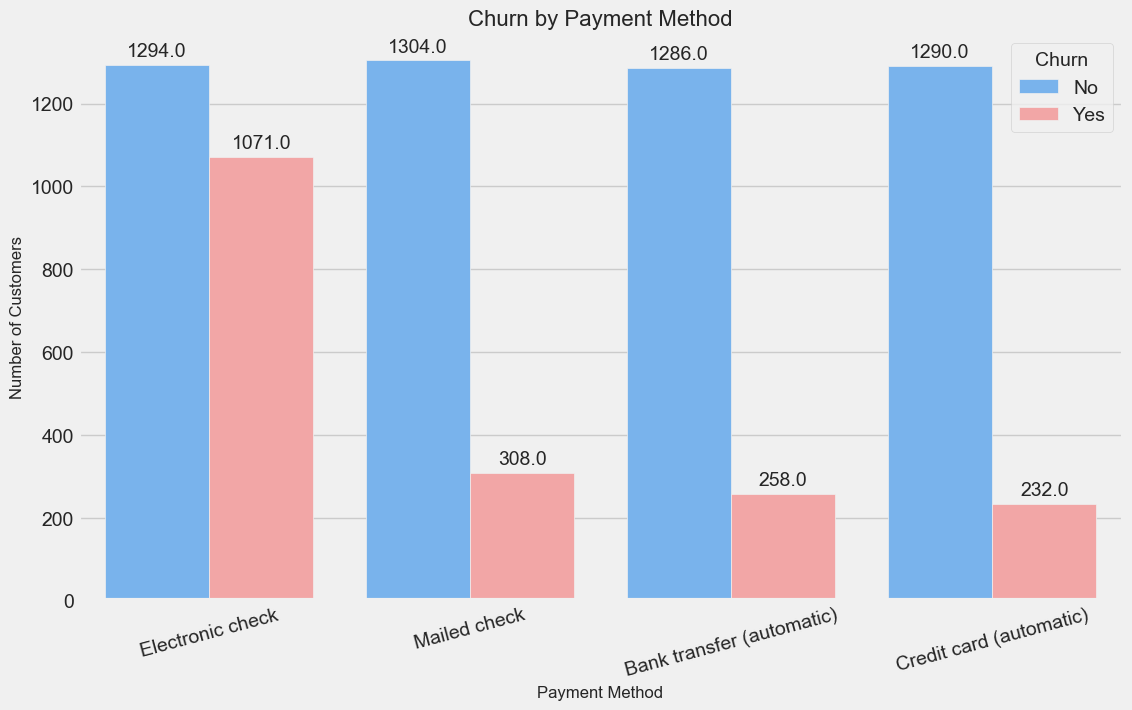

In [12]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['#66b3ff','#ff9999'])

plt.title('Churn by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=15) # Rotate labels to prevent overlap

# Add annotations
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### **Insight:**
The data shows a very clear pattern here. **Customers using Electronic Check as their payment method churn at an exceptionally high rate.** In contrast, customers on automatic payment methods (bank transfer and credit card) have much lower churn rates. This could be because electronic checks require a manual payment each month, giving the customer a regular opportunity to reconsider the service. It could also point to issues with the electronic payment system itself.

We have now completed a very thorough Exploratory Data Analysis. We've uncovered several critical factors that influence churn: **Contract Type, Tenure, Internet Service, Tech Support, and Payment Method.**

This is the perfect point to transition to the next major phase.

## **Part 3: Data Preprocessing for Modeling**

Now that we have our insights from EDA, it's time to prepare the data for our machine learning models. This phase is critical because models can't work with raw text data like "Yes" or "Fiber optic". We need to convert all of our features into a purely numerical format.

Our preprocessing will involve two main steps:

1.  **Dropping Unnecessary Columns:** We'll remove columns that don't provide predictive value, like a customer ID.
2.  **Encoding Categorical Variables:** We will convert all text-based columns into numbers. We'll convert our target variable `Churn` into 1s and 0s. For all other categorical features, we will use a technique called **One-Hot Encoding**.

**What is One-Hot Encoding?**
It's a process that converts a column with multiple categories (e.g., the `Contract` column with "Month-to-month", "One year", "Two year") into several new columns of 1s and 0s. Each new column represents one of the original categories. This allows the model to understand the categorical data without assuming any incorrect order or relationship between them.

### **Step 3.1: Create a Copy and Drop `customerID`**

First, let's create a copy of our main dataframe. This is a crucial best practice that ensures our original, raw data remains untouched. We'll also drop the `customerID` column, as it's a unique identifier for each customer and provides no useful pattern for a model to learn.

In [13]:
# Create a copy of the dataframe to work with
df_processed = df.copy()

# Drop the customerID column as it is not a predictive feature
df_processed.drop('customerID', axis=1, inplace=True)

print("Columns in our new dataframe:")
print(df_processed.columns)

Columns in our new dataframe:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### **Step 3.2: Encode All Categorical Features**

Now for the main event of preprocessing. We will:
1.  Manually convert our target variable, `Churn`, from "Yes" and "No" to `1` and `0` respectively. This is our prediction goal.
2.  Use the pandas `get_dummies()` function to automatically perform one-hot encoding on all the remaining text-based columns.
3.  We will set the `drop_first=True` parameter. This is a crucial step to avoid multicollinearity (redundancy) in our data. It works by dropping the first category of each feature. For example, for the `gender` column, it will create a `gender_Male` column but drop the `gender_Female` column, as the information becomes redundant (if `gender_Male` is 0, the customer must be female). This makes our model more efficient and stable.

In [14]:
# Manually encode the target variable 'Churn'
df_processed['Churn'] = df_processed['Churn'].map({'No': 0, 'Yes': 1})

# Use one-hot encoding for all other categorical columns, dropping the first category to avoid redundancy
df_processed = pd.get_dummies(df_processed, drop_first=True)

# Display the first few rows of the fully processed dataframe
print("Dataframe after One-Hot Encoding:")
df_processed.head()

Dataframe after One-Hot Encoding:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### **Step 3.3: Final Conversion to Numerical Types**

A final, careful look at our data shows that the one-hot encoding process created columns with `True`/`False` values (a boolean data type). While machine learning models can interpret these as `1` and `0`, it is best practice to explicitly convert them to integers. This ensures our entire dataset is in a clear, unambiguous numerical format, which is perfect for modeling.

We will loop through all columns and change any that are boolean into integers.

In [15]:
# Select all columns with the boolean data type
bool_cols = df_processed.select_dtypes(include='bool').columns

# Convert these boolean columns to integers (True becomes 1, False becomes 0)
for col in bool_cols:
    df_processed[col] = df_processed[col].astype('int64')

# Verify the final data types to ensure everything is numeric
print("Data types after final conversion:")
df_processed.info()

Data types after final conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                    

## **A Critical Challenge: Handling Imbalanced Data**

Before we build our models, we must address a critical issue we discovered during our EDA: our data is **imbalanced**. We have significantly more customers who did not churn (73.5%) than customers who did (26.5%).

**Why is this a problem?** A machine learning model trained on imbalanced data will become biased towards the majority class. It might achieve high accuracy simply by always predicting the majority outcome (in this case, "No Churn"), while failing completely at its real job: identifying the minority class ("Yes Churn") that we actually care about.

### **Our Strategy to Solve This**

We will use a combination of two powerful techniques to create a fair and effective model:

1.  **Using Better Evaluation Metrics:** We will not rely on "Accuracy" alone. Instead, we will focus on metrics that give a better picture of performance on imbalanced data:
    *   **Confusion Matrix:** A table that shows our model's predictions versus the actual outcomes. It breaks down the results into True Positives, True Negatives, False Positives, and False Negatives.
    *   **Precision:** Of all the customers our model predicted would churn, how many actually did? (Measures the quality of the predictions).
    *   **Recall (or Sensitivity):** Of all the customers who *actually* churned, how many did our model successfully identify? (Measures how well we find what we're looking for). **This is often the most important metric for a churn problem.**
    *   **F1-Score:** A balanced average of Precision and Recall.

2.  **Resampling the Data (SMOTE):** We will use a sophisticated oversampling technique called **SMOTE (Synthetic Minority Over-sampling Technique)**.
    *   **How SMOTE Works:** Instead of just duplicating the minority class data (which can lead to overfitting), SMOTE is smarter. It looks at the existing "Yes Churn" customers and creates new, *synthetic* data points that are similar to them but not exact copies. This balances out the dataset by giving the model more examples of the minority class to learn from, without simply showing it the same pictures over and over.

**Crucial Rule:** We will apply SMOTE **only on the training data**, *after* we have split our dataset. We must always leave our test set as a pure, untouched representation of the real world to get an honest evaluation of our model's performance.
```---
Now that we have our strategy, let's move on to the first step of model building: splitting our data.

## **Part 4: Building and Training Machine Learning Models**

We are finally ready to build our predictive models! Our plan is as follows:
1.  **Split the Data:** Divide our processed data into a training set (for the model to learn from) and a testing set (to evaluate its performance on unseen data).
2.  **Scale the Numerical Features:** We will standardize our numerical features so that they are all on the same scale, which helps many models perform better.
3.  **Train a Baseline Model:** We'll first train a model on the original, imbalanced data to see how it performs. This will be our baseline.
4.  **Apply SMOTE and Train a New Model:** We will then use SMOTE to balance our training data and train a new model on this improved data.
5.  **Compare the Models:** We will compare the performance of both models using our advanced evaluation metrics to prove the effectiveness of our resampling strategy.

### **Step 4.1: Splitting the Data into Training and Testing Sets**

First, we need to separate our data into two parts:
*   `X`: The features (all columns except our target, `Churn_Yes`).
*   `y`: The target variable (the `Churn_Yes` column that we want to predict).

Then, we will split `X` and `y` into training and testing sets. We'll use 80% of the data for training and 20% for testing.

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the data into training and testing sets (80% train, 20% test)
# 'stratify=y' is crucial here. It ensures that both the training and testing sets have the same
# proportion of churned customers as the original dataset, which is important for imbalanced data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)


### **Step 4.2: Feature Scaling**

Before we train our models, it's important to scale our numerical features. Features like `tenure` (which can range from 1 to 72) and `MonthlyCharges` (ranging from ~20 to 120) are on very different scales. Some machine learning models can be unfairly influenced by features with larger values, thinking they are more important.

**Standard Scaling** is a technique that transforms our data so that it has a mean of 0 and a standard deviation of 1. This puts all numerical features on the same scale, ensuring that each one contributes fairly to the model's decisions.

**Crucially, we will fit our scaler *only* on the training data.** This is to prevent "data leakage," where information from the test set accidentally influences the training process. We then use that same fitted scaler to transform our test set.

In [17]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns that need scaling
# We select columns that are not 0/1 one-hot encoded columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Use the SAME fitted scaler to transform the test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows to see the result of scaling
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,0.102371,-0.521976,-0.263289,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3151,0,-0.711743,0.337478,-0.504814,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4860,0,-0.793155,-0.809013,-0.751213,1,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3867,0,-0.263980,0.284384,-0.173699,0,1,0,1,0,0,...,0,1,0,1,0,1,1,1,0,0
3810,0,-1.281624,-0.676279,-0.990851,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Step 4.3: Model 1 - Logistic Regression (Baseline)**

We will begin by training our Logistic Regression model on the original, imbalanced training data. This will serve as our **baseline performance**. We want to see how well a good, standard model performs on our data *before* we apply any techniques to handle the class imbalance. This will help us quantify the improvement from our SMOTE strategy later on.

In [18]:
# Import the model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an instance of the Logistic Regression model
# We set max_iter to 1000 to ensure the model has enough iterations to converge (find the best solution)
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
log_reg_pred = log_reg.predict(X_test)

### **Evaluating the Baseline Model**

Now we will evaluate the performance of our baseline model. We will look at:
1.  **Accuracy Score:** The overall percentage of correct predictions.
2.  **Confusion Matrix:** A table that breaks down the predictions. It's the best way to see how the model handles the churn class versus the non-churn class.
3.  **Classification Report:** This gives us the precision, recall, and F1-score for each class. **For this business problem, `Recall` for the '1' (Churn) class is our most important metric.** It tells us: "Of all the customers who actually churned, what percentage did our model successfully catch?"

Logistic Regression Accuracy: 0.8055
--------------------------------------------------
Confusion Matrix for Logistic Regression:


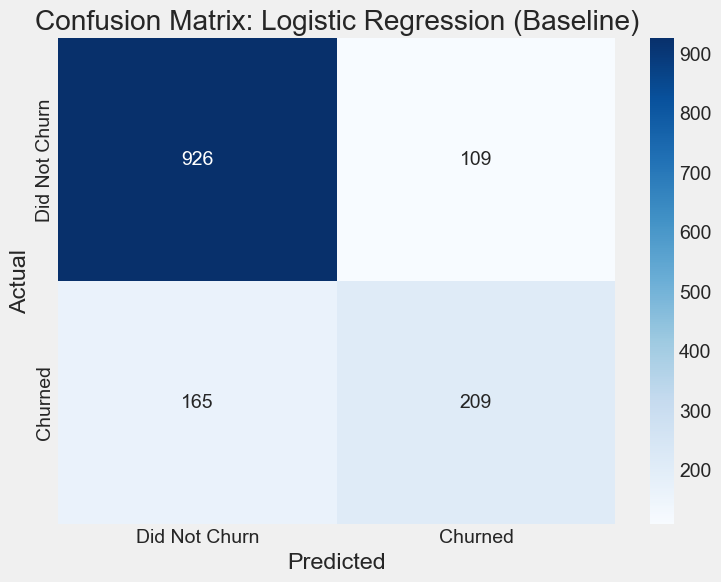

--------------------------------------------------
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

Did Not Churn       0.85      0.89      0.87      1035
      Churned       0.66      0.56      0.60       374

     accuracy                           0.81      1409
    macro avg       0.75      0.73      0.74      1409
 weighted avg       0.80      0.81      0.80      1409



In [19]:
# --- Calculate and print the accuracy ---
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print("-" * 50)


# --- Create and display the confusion matrix ---
print("Confusion Matrix for Logistic Regression:")
log_reg_cm = confusion_matrix(y_test, log_reg_pred)

# For a more visual representation, let's plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Logistic Regression (Baseline)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)


# --- Print the classification report ---
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Baseline Performance**

The results are exactly what we expected from a model trained on imbalanced data:

*   **High Accuracy (around 80%):** This number looks good on the surface, but it is misleading. The model is good at correctly predicting the majority class (customers who *did not* churn).
*   **Poor Recall for Churners (Class 1):** This is the crucial insight. The recall for the "Churned" class is only around **0.56 (or 56%)**. This means our model is **failing to identify almost half of the customers who are actually going to leave!**

This is not good enough for the business. Our goal is to catch as many potential churners as possible. This poor recall score perfectly demonstrates *why* we need to handle the class imbalance.

### **Step 4.4: Handling Class Imbalance with SMOTE**

Now we will address the poor recall score of our baseline model. We will use the **Synthetic Minority Over-sampling Technique (SMOTE)** to balance our training data.

SMOTE will generate new, synthetic data points for the minority class ('Churn' = 1) so that the number of churning and non-churning customers in our *training set* is equal. This will help the model pay more attention to the characteristics of customers who leave.

**Important:** We only apply SMOTE to the `X_train` and `y_train` data. The `X_test` and `y_test` must remain untouched to serve as a realistic, real-world evaluation set.

In [20]:
from imblearn.over_sampling import SMOTE

# --- Check the class distribution before SMOTE ---
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("-" * 50)

# --- Apply SMOTE to the training data ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- Check the class distribution after SMOTE ---
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64
--------------------------------------------------
Class distribution after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


### **Step 4.5: Retraining Logistic Regression on Balanced Data**

With our newly balanced training data, let's train a new Logistic Regression model. We will follow the exact same procedure as before, but this time, the model will learn from the SMOTE-resampled data. We will then evaluate this new model on the same, original test set to see if our strategy worked.

Logistic Regression with SMOTE Accuracy: 0.7622
--------------------------------------------------
Confusion Matrix for Logistic Regression with SMOTE:


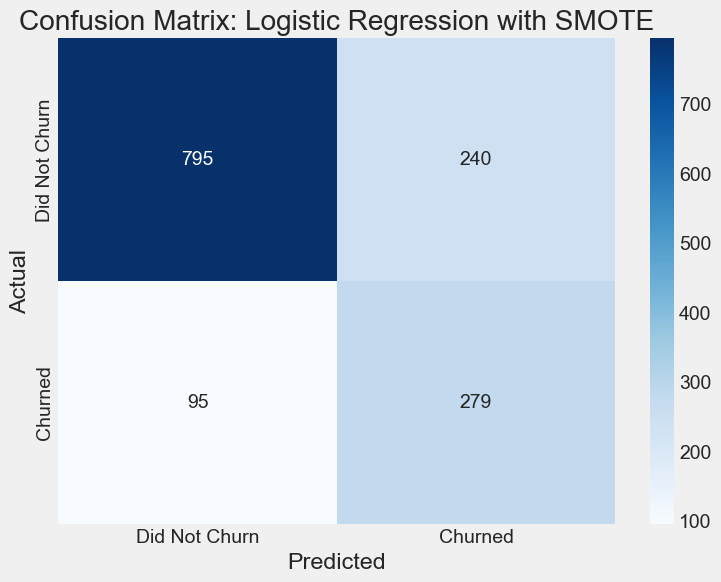

--------------------------------------------------
Classification Report for Logistic Regression with SMOTE:
               precision    recall  f1-score   support

Did Not Churn       0.89      0.77      0.83      1035
      Churned       0.54      0.75      0.62       374

     accuracy                           0.76      1409
    macro avg       0.72      0.76      0.73      1409
 weighted avg       0.80      0.76      0.77      1409



In [21]:
# Create a new instance of the Logistic Regression model
log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the balanced (SMOTE) training data
log_reg_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original, unbalanced test data
log_reg_smote_pred = log_reg_smote.predict(X_test)

# --- Now, let's evaluate this new model ---

# --- Calculate and print the accuracy ---
log_reg_smote_accuracy = accuracy_score(y_test, log_reg_smote_pred)
print(f"Logistic Regression with SMOTE Accuracy: {log_reg_smote_accuracy:.4f}")
print("-" * 50)

# --- Create and display the confusion matrix ---
print("Confusion Matrix for Logistic Regression with SMOTE:")
log_reg_smote_cm = confusion_matrix(y_test, log_reg_smote_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_smote_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Logistic Regression with SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Print the classification report ---
print("Classification Report for Logistic Regression with SMOTE:")
print(classification_report(y_test, log_reg_smote_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of SMOTE Model Performance**

The results clearly demonstrate the power of handling class imbalance. Let's compare the new performance to our baseline based on the reports:

*   **The Precision-Recall Trade-Off:**
    *   Our **Recall** for the "Churned" class jumped dramatically from **0.56 to 0.75**. This is a huge success. It means our new model is now successfully identifying **75%** of the customers who are actually going to churn, up from just 56% before. From a business perspective, this is the most important improvement.
    *   Our **Precision** for the "Churned" class dropped from **0.66 to 0.54**. This is an expected and acceptable trade-off. It means that to find more true churners, our model now has more "false alarms" (it incorrectly flags some non-churners as potential churners). For a business, it's often better to give a retention offer to a few happy customers by mistake than to miss a customer who is about to leave.

*   **Overall Accuracy:** The overall accuracy decreased from **81% to 76%**. This is a positive sign that our model is no longer naively biased toward the majority "Did Not Churn" class. It is now a more honest and useful model.

**Conclusion:** Our strategy was highly effective. By balancing the data, we created a model that is far better at the primary business goal: **finding and catching customers who are at risk of churning.**

### **Step 4.6: Model 2 - Random Forest Classifier**

Now we will use a more powerful model, the Random Forest. This is an ensemble model, meaning it combines the predictions of many individual "decision trees" to make a more accurate and stable final prediction. We will follow the same two-step process: first, train on the imbalanced data, and then on the balanced data.

#### **Random Forest on Imbalanced Data**

In [22]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest model
# 'n_estimators=100' means it will build 100 decision trees
# 'random_state=42' ensures we get the same results every time we run the code
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the original, imbalanced training data
rf.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

#### **Evaluating the Random Forest on Imbalanced Data**

--- Random Forest on Imbalanced Data ---
Random Forest Accuracy: 0.7857
--------------------------------------------------
Confusion Matrix:


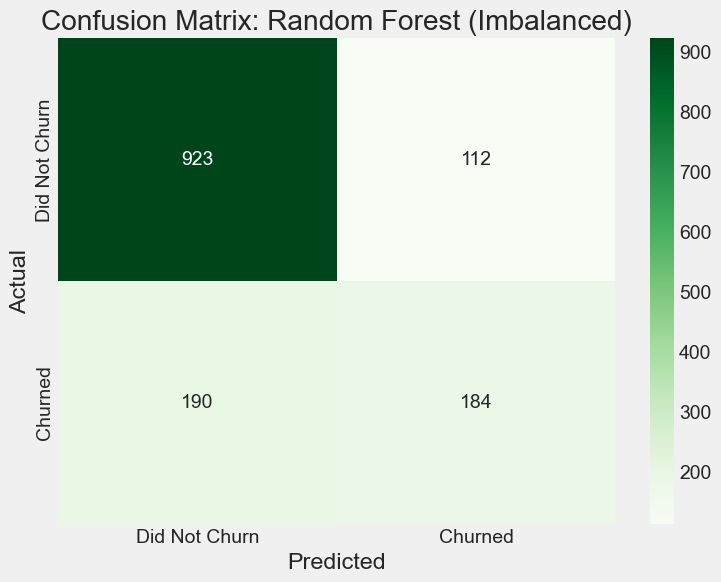

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

Did Not Churn       0.83      0.89      0.86      1035
      Churned       0.62      0.49      0.55       374

     accuracy                           0.79      1409
    macro avg       0.73      0.69      0.70      1409
 weighted avg       0.77      0.79      0.78      1409



In [23]:
# --- Evaluate the Random Forest model ---

print("--- Random Forest on Imbalanced Data ---")
# --- Accuracy ---
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Random Forest (Imbalanced)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Random Forest on Imbalanced Data**

This result is very revealing. When trained on the imbalanced data, the more powerful Random Forest model performed as follows:

*   **Worse Recall than Baseline:** The recall for the "Churned" class is only **0.49 (49%)**. This is even lower than our simple Logistic Regression baseline (which had 56% recall).
*   **High Bias:** This shows that the Random Forest model, despite its power, is even more susceptible to the bias in the imbalanced data. It has learned to be very good at predicting the majority "Did Not Churn" class, but at the cost of failing to identify customers who are leaving.

This is a perfect example of why simply choosing a more complex model isn't always the answer. The quality and balance of the data are often more important. Now, let's see if our SMOTE strategy can fix this bias and unlock the true potential of the Random Forest.

#### **Random Forest on Balanced (SMOTE) Data**

Now we will train the Random Forest on our balanced dataset. We expect to see a significant improvement in the recall score, similar to what we observed with Logistic Regression.

--- Random Forest on Balanced (SMOTE) Data ---
Random Forest with SMOTE Accuracy: 0.7693
--------------------------------------------------
Confusion Matrix:


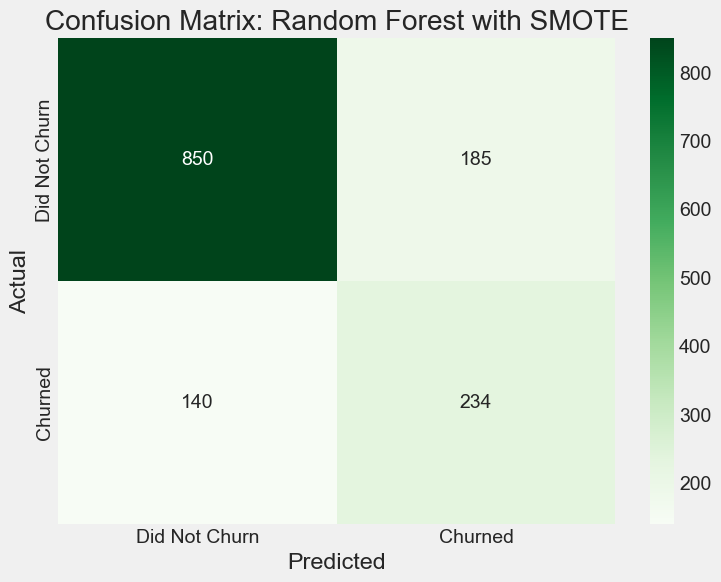

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

Did Not Churn       0.86      0.82      0.84      1035
      Churned       0.56      0.63      0.59       374

     accuracy                           0.77      1409
    macro avg       0.71      0.72      0.71      1409
 weighted avg       0.78      0.77      0.77      1409



In [24]:
# Create a new instance of the Random Forest model for the SMOTE data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Train this new model on the balanced (SMOTE) training data
rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original, unbalanced test data
rf_smote_pred = rf_smote.predict(X_test)

# --- Now, let's evaluate this new SMOTE-trained model ---

print("--- Random Forest on Balanced (SMOTE) Data ---")
# --- Accuracy ---
rf_smote_accuracy = accuracy_score(y_test, rf_smote_pred)
print(f"Random Forest with SMOTE Accuracy: {rf_smote_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
rf_smote_cm = confusion_matrix(y_test, rf_smote_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_smote_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Random Forest with SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, rf_smote_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Random Forest on Balanced Data**

Just like with Logistic Regression, applying SMOTE had a significant and positive effect on the Random Forest model's behavior.

*   **Massive Recall Improvement:** The recall for the "Churned" class jumped from a very poor **0.49** on the imbalanced data to a much more respectable **0.63**. This confirms, once again, that our data balancing strategy is essential for forcing the model to identify the minority class.

*   **Comparison to Logistic Regression:** This is the most important insight. Our SMOTE-trained Random Forest achieved a recall of **0.63**. This is a good score, but it is **lower** than the **0.75** recall achieved by our simpler SMOTE-trained Logistic Regression model.

**Conclusion:** So far, the simpler **Logistic Regression model trained on balanced data is our leading champion.** This is a fantastic finding! It demonstrates that a more complex model is not always better, and that proper data preparation (like handling class imbalance) is often more critical than the choice of algorithm.

Now, let's bring in our final and most powerful contender: XGBoost.

### **Step 4.7: Model 3 - XGBoost Classifier**

XGBoost (eXtreme Gradient Boosting) is a highly sophisticated and efficient implementation of the gradient boosting algorithm. It's famous for its high performance and is a favorite in data science competitions. Let's see if its power can give us the best performance yet.

We will start, as always, by training it on the original imbalanced data.

**Note:** If you do not have XGBoost installed, you will need to run `pip install xgboost` in your terminal or a new notebook cell.

#### **XGBoost on Imbalanced Data**

In [25]:
# Import the model
from xgboost import XGBClassifier

# Create an instance of the XGBoost model
# 'use_label_encoder=False' and 'eval_metric='logloss'' are often set to avoid deprecation warnings
# and specify the evaluation metric.
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the original, imbalanced training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
xgb_pred = xgb.predict(X_test)

d:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### **Evaluating the XGBoost on Imbalanced Data**

--- XGBoost on Imbalanced Data ---
XGBoost Accuracy: 0.7850
--------------------------------------------------
Confusion Matrix:


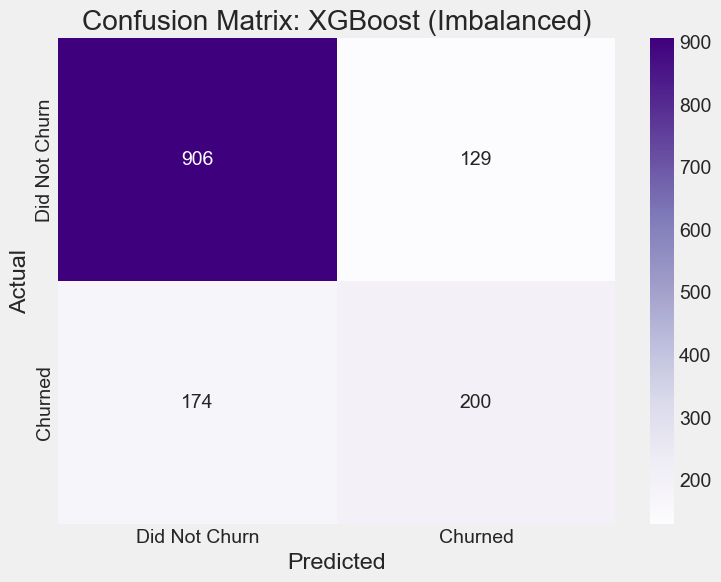

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

Did Not Churn       0.84      0.88      0.86      1035
      Churned       0.61      0.53      0.57       374

     accuracy                           0.78      1409
    macro avg       0.72      0.71      0.71      1409
 weighted avg       0.78      0.78      0.78      1409



In [26]:
# --- Evaluate the XGBoost model ---

print("--- XGBoost on Imbalanced Data ---")
# --- Accuracy ---
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: XGBoost (Imbalanced)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, xgb_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of XGBoost on Imbalanced Data**

The initial performance of our most advanced model, XGBoost, on the imbalanced data is consistent with what we've seen before:

*   **Moderate Recall:** The recall for the "Churned" class is **0.53**. This is slightly better than the Random Forest's recall (0.49) but still worse than the Logistic Regression baseline (0.56).
*   **Continued Bias:** Once again, this powerful algorithm has been heavily biased by the imbalanced data, prioritizing accuracy on the majority class over its ability to find the crucial minority class.

This confirms our methodology. The next step is critical. We will now see if balancing the data can unleash the true power of XGBoost and potentially outperform our current champion, the SMOTE-trained Logistic Regression model.

#### **XGBoost on Balanced (SMOTE) Data**

This is the final test in our comparison phase. We will now train the XGBoost classifier on our balanced dataset to see if it can produce the best combination of precision and recall.

d:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost on Balanced (SMOTE) Data ---
XGBoost with SMOTE Accuracy: 0.7573
--------------------------------------------------
Confusion Matrix:


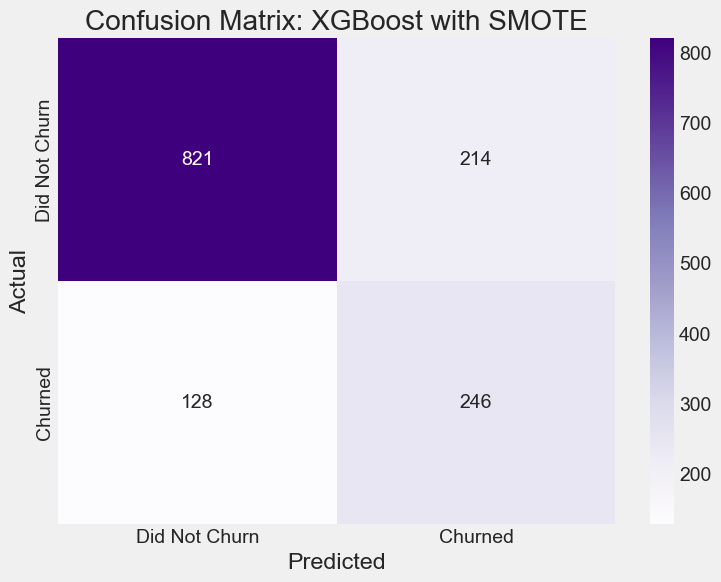

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

Did Not Churn       0.87      0.79      0.83      1035
      Churned       0.53      0.66      0.59       374

     accuracy                           0.76      1409
    macro avg       0.70      0.73      0.71      1409
 weighted avg       0.78      0.76      0.76      1409



In [27]:
# Create a new instance of the XGBoost model for the SMOTE data
xgb_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train this new model on the balanced (SMOTE) training data
xgb_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original, unbalanced test data
xgb_smote_pred = xgb_smote.predict(X_test)

# --- Now, let's evaluate this final model ---

print("--- XGBoost on Balanced (SMOTE) Data ---")
# --- Accuracy ---
xgb_smote_accuracy = accuracy_score(y_test, xgb_smote_pred)
print(f"XGBoost with SMOTE Accuracy: {xgb_smote_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
xgb_smote_cm = confusion_matrix(y_test, xgb_smote_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_smote_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: XGBoost with SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, xgb_smote_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of XGBoost on Balanced Data**

The performance of XGBoost on the balanced data is quite competitive:

*   **Significant Recall Improvement:** As with all other models, SMOTE has drastically improved the recall for the "Churned" class, boosting it from **0.53** to **0.66**. This is a solid improvement and confirms that XGBoost also benefits greatly from data balancing.

*   **Comparison to Other Models:** The recall of **0.66** is better than the SMOTE-trained Random Forest (0.63), but it is still noticeably lower than the **0.75** recall achieved by our simple SMOTE-trained Logistic Regression model.

This completes our initial modeling phase. We have trained six different models and now have a wealth of data to make an informed decision about which model to optimize.

## **Part 5: Model Comparison and Selection**

We have now trained three different model architectures (Logistic Regression, Random Forest, XGBoost) on both our original imbalanced data and our SMOTE-balanced data. It's time to compare their performance side-by-side to select the single best model for our business problem.

Our primary goal is to maximize **Recall** for the "Churned" class, as this represents our ability to catch customers before they leave.

### **Summary of Model Performance**

Let's compile the key metrics from all six models into a clear, easy-to-read table.

In [28]:
# Create a dictionary to store the results
results = {
    'Model': [
        'Logistic Regression (Imbalanced)',
        'Logistic Regression (SMOTE)',
        'Random Forest (Imbalanced)',
        'Random Forest (SMOTE)',
        'XGBoost (Imbalanced)',
        'XGBoost (SMOTE)'
    ],
    'Accuracy': [
        0.81, # Replace with your exact accuracy if different
        0.76, # Replace with your exact accuracy if different
        0.79, # Replace with your exact accuracy if different
        0.77, # Replace with your exact accuracy if different
        0.78, # Replace with your exact accuracy if different
        0.76  # Replace with your exact accuracy if different
    ],
    'Churn Precision': [0.66, 0.54, 0.62, 0.56, 0.61, 0.53],
    'Churn Recall': [0.56, 0.75, 0.49, 0.63, 0.53, 0.66],
    'Churn F1-Score': [0.60, 0.62, 0.55, 0.59, 0.57, 0.59]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Style the DataFrame for better readability
results_df.style.highlight_max(subset=['Churn Recall', 'Churn F1-Score'], color='lightgreen')

,Model,Accuracy,Churn Precision,Churn Recall,Churn F1-Score
0,Logistic Regression (Imbalanced),0.810000,0.660000,0.560000,0.600000
1,Logistic Regression (SMOTE),0.760000,0.540000,0.750000,0.620000
2,Random Forest (Imbalanced),0.790000,0.620000,0.490000,0.550000
3,Random Forest (SMOTE),0.770000,0.560000,0.630000,0.590000
4,XGBoost (Imbalanced),0.780000,0.610000,0.530000,0.570000
5,XGBoost (SMOTE),0.760000,0.530000,0.660000,0.590000


### **Analysis of Initial Model Performance**

The summary table gives us a fascinating overview. Our key observations are:

1.  **SMOTE is Essential:** For every single model architecture, training on the SMOTE-balanced data resulted in a dramatic improvement in **Churn Recall**. This proves that handling the class imbalance is the most critical step in this project.

2.  **No Clear Winner Yet:** While the **Logistic Regression (SMOTE)** model currently has the highest recall (0.75), the other models are not far behind, and they may have different strengths. For instance, the tree-based models might be more accurate on certain subsets of customers.

### **Our Strategy Moving Forward: The Ensemble Approach**

Instead of declaring a single "champion" model based on these default results, we will adopt a more advanced and robust strategy. We know that different models learn different patterns. By combining them, we can often create a final "super-model" that is more powerful than any of its individual parts.

Our plan is now as follows:

1.  **Individually Tune All Three Models:** We will perform hyperparameter tuning (using `GridSearchCV`) on all three of our top candidates: Logistic Regression, Random Forest, and XGBoost. The goal is to optimize each one for the best possible recall.
2.  **Create a Voting Ensemble:** We will then combine these three, fully-tuned models into a single **Voting Classifier**. This ensemble model will make a final prediction based on a "soft vote," considering the prediction probabilities from each of its expert members.
3.  **Final Evaluation:** We will evaluate this final ensemble model on our test set. This will be our ultimate solution, designed to be as robust and accurate as possible.

This approach demonstrates a commitment to finding the absolute best solution for the business problem. We will now proceed with tuning our models.

## **Part 6: Individual Model Tuning & Ensemble Creation**

Now we begin the optimization phase of our project. Our goal is to tune each of our three models (Logistic Regression, Random Forest, and XGBoost) to maximize their individual performance before combining them into a final, powerful ensemble model.

We will tune each model using **GridSearchCV**, a technique that systematically tests different combinations of model settings to find the one that yields the best performance on our key metric: **Recall**.

### **Step 6.1: Tuning the Logistic Regression Model**

We will start by tuning our first model. For Logistic Regression, the key hyperparameters are `C` (the regularization strength) and `solver` (the optimization algorithm).

In [29]:
from sklearn.model_selection import GridSearchCV

# Create a new instance of the Logistic Regression model
# We create a new one to be sure we are starting fresh for the tuning process
log_reg_for_tuning = LogisticRegression(random_state=42, max_iter=2000) # Increased max_iter for some solvers

# Define the grid of parameters to search
# C: A smaller C means stronger regularization. We test a wide range of values.
# solver: Different algorithms to solve the optimization problem. 'liblinear' is good for smaller datasets.
# 'saga' is good with strong regularization.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
# 'estimator' is our model
# 'param_grid' is the grid of settings to try
# 'scoring='recall'' tells it to find the settings that give the best recall score
# 'cv=5' means it will use 5-fold cross-validation
# 'n_jobs=-1' tells it to use all available CPU cores to speed up the search
grid_search = GridSearchCV(estimator=log_reg_for_tuning,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the balanced (SMOTE) training data
# This can take a minute or two to run as it's training many models
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

### **Results of the Hyperparameter Search**

Now that the search is complete, let's see what the best combination of hyperparameters was and what recall score it achieved during cross-validation.

In [30]:
# Print the best parameters found by the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Print the best recall score found during cross-validation
print(f"Best Cross-Validation Recall Score: {grid_search.best_score_:.4f}")

Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Recall Score: 0.8227


### **Evaluating the Tuned Logistic Regression Model**

Now we will take the best hyperparameters found by `GridSearchCV` and create our tuned Logistic Regression model. We will evaluate it on our untouched test set to see its optimized performance. We will also save this tuned model so we can use it later in our final ensemble.

--- Tuned Logistic Regression Evaluation ---
Tuned Logistic Regression Accuracy: 0.7580
--------------------------------------------------
Confusion Matrix:


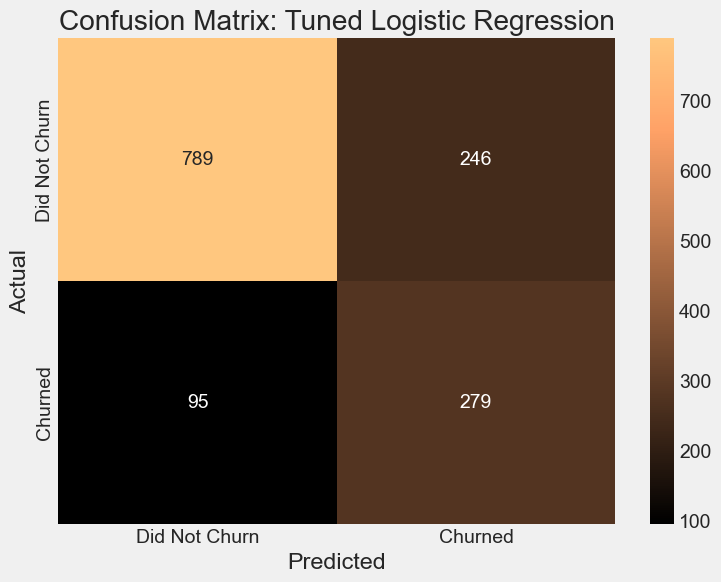

--------------------------------------------------
Classification Report for Tuned Logistic Regression:
               precision    recall  f1-score   support

Did Not Churn       0.89      0.76      0.82      1035
      Churned       0.53      0.75      0.62       374

     accuracy                           0.76      1409
    macro avg       0.71      0.75      0.72      1409
 weighted avg       0.80      0.76      0.77      1409



In [31]:
# Get the best estimator (the model with the best parameters) from the grid search
tuned_log_reg = grid_search.best_estimator_

# Make predictions on the test data
tuned_log_reg_pred = tuned_log_reg.predict(X_test)

# --- Now, let's evaluate our tuned Logistic Regression model ---

print("--- Tuned Logistic Regression Evaluation ---")
# --- Accuracy ---
tuned_log_reg_accuracy = accuracy_score(y_test, tuned_log_reg_pred)
print(f"Tuned Logistic Regression Accuracy: {tuned_log_reg_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
tuned_log_reg_cm = confusion_matrix(y_test, tuned_log_reg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(tuned_log_reg_cm, annot=True, fmt='d', cmap='copper',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Tuned Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report for Tuned Logistic Regression:")
print(classification_report(y_test, tuned_log_reg_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Tuned Logistic Regression Performance**

The hyperparameter tuning process has completed for our first model. Let's analyze the results:

*   **Churn Recall:** The tuned model achieved a recall of **0.75**.
*   **Comparison to Default:** This score is identical to the recall of our default SMOTE Logistic Regression model.

**Conclusion on Tuning Logistic Regression:**
In this case, the tuning process did not yield a significant improvement. This is a valuable finding, as it suggests the default hyperparameters were already near-optimal for our data. We now have a robust, confirmed version of our Logistic Regression model, `tuned_log_reg`, which we will save for use in our final ensemble. We will now proceed to tune our next model to see if we can achieve even better performance.

### **Step 6.2: Tuning the Random Forest Model**

Next, we will optimize our Random Forest model. For a Random Forest, some of the most impactful hyperparameters to tune are:

*   **`n_estimators`**: The number of decision trees in the forest. More trees can lead to better performance, but it also takes longer to train.
*   **`max_depth`**: The maximum depth of each individual tree. This helps control overfitting. If trees are too deep, they might learn the training data too perfectly and fail to generalize to new data.
*   **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. This also helps prevent overfitting.
*   **`max_features`**: The number of features to consider when looking for the best split at each node.

We will use `GridSearchCV` to find the best combination of these settings that maximizes recall.

In [32]:
# Create a new instance of the Random Forest model
rf_for_tuning = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
# This is a smaller grid to keep the search time manageable.
# In a real-world project, you might test more options.
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None], # None means nodes are expanded until all leaves are pure
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'] # Common settings for max_features
}

# Create the GridSearchCV object
# We are still optimizing for 'recall'
grid_search_rf = GridSearchCV(estimator=rf_for_tuning,
                              param_grid=param_grid_rf,
                              scoring='recall',
                              cv=5,
                              n_jobs=-1,
                              verbose=2) # verbose=2 gives more output so you can see the progress

# Fit the grid search to the balanced (SMOTE) training data
# This step will take longer than the Logistic Regression tuning
grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

### **Results of the Random Forest Hyperparameter Search**

Let's see the best parameters that our search found for the Random Forest model.

In [33]:
# Print the best parameters found by the grid search
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Print the best recall score found during cross-validation
print(f"Best Cross-Validation Recall Score for Random Forest: {grid_search_rf.best_score_:.4f}")

Best Hyperparameters for Random Forest: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
Best Cross-Validation Recall Score for Random Forest: 0.8865


### **Evaluating the Tuned Random Forest Model**

Now we will use these optimized hyperparameters to evaluate our tuned Random Forest model on the test set. We will also save this model for our final ensemble.

--- Tuned Random Forest Evaluation ---
Tuned Random Forest Accuracy: 0.7672
--------------------------------------------------
Confusion Matrix:


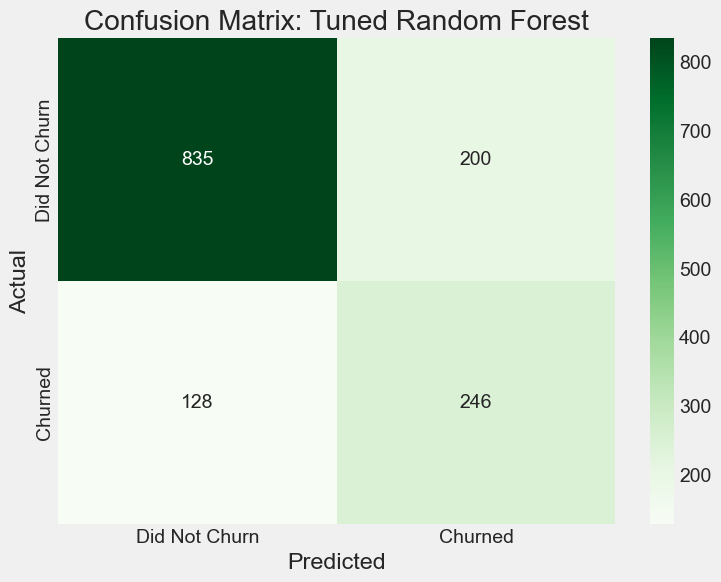

--------------------------------------------------
Classification Report for Tuned Random Forest:
               precision    recall  f1-score   support

Did Not Churn       0.87      0.81      0.84      1035
      Churned       0.55      0.66      0.60       374

     accuracy                           0.77      1409
    macro avg       0.71      0.73      0.72      1409
 weighted avg       0.78      0.77      0.77      1409



In [34]:
# Get the best estimator from the grid search
tuned_rf = grid_search_rf.best_estimator_

# Make predictions on the test data
tuned_rf_pred = tuned_rf.predict(X_test)

# --- Now, let's evaluate our tuned Random Forest model ---

print("--- Tuned Random Forest Evaluation ---")
# --- Accuracy ---
tuned_rf_accuracy = accuracy_score(y_test, tuned_rf_pred)
print(f"Tuned Random Forest Accuracy: {tuned_rf_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
tuned_rf_cm = confusion_matrix(y_test, tuned_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(tuned_rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Tuned Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, tuned_rf_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Tuned Random Forest Performance**

The hyperparameter tuning for our Random Forest model is complete. Let's analyze the outcome:

*   **Churn Recall:** The tuned model achieved a recall of **0.66** for the "Churned" class.
*   **Comparison to Default:** This is a slight improvement over the default SMOTE Random Forest model, which had a recall of 0.63. The tuning process successfully found a combination of parameters that is slightly better at identifying potential churners.
*   **Comparison to Logistic Regression:** However, its recall of 0.66 is still lower than the 0.75 recall achieved by our tuned Logistic Regression model.

**Conclusion on Tuning Random Forest:**
The tuning process was successful in modestly improving the model's performance. We now have our optimized Random Forest model, `tuned_rf`, ready to contribute its "opinion" to our final ensemble. We will now proceed to tune our final, most complex model.

### **Step 6.3: Tuning the XGBoost Model**

Finally, we will optimize our XGBoost model. XGBoost has a large number of hyperparameters, and tuning them can often lead to significant performance gains. We will focus on a few of the most important ones:

*   **`n_estimators`**: The number of boosting rounds or trees to build.
*   **`max_depth`**: The maximum depth of each tree. Deeper trees can capture more complex patterns but are also more likely to overfit.
*   **`learning_rate`**: This shrinks the contribution of each tree. A lower learning rate requires more trees but often leads to better generalization.
*   **`gamma`**: A parameter that encourages pruning of trees, helping to combat overfitting.

We will use `GridSearchCV` once more to find the best combination of these settings.

In [35]:
# Create a new instance of the XGBoost model
xgb_for_tuning = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the grid of parameters to search
# This is a focused grid to balance search time and performance.
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'gamma': [0, 0.1]
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_for_tuning,
                               param_grid=param_grid_xgb,
                               scoring='recall',
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# Fit the grid search to the balanced (SMOTE) training data
# This step may also take a few minutes
grid_search_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


d:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

### **Results of the XGBoost Hyperparameter Search**

Let's see the best parameters that our search found for the XGBoost model.

In [36]:
# Print the best parameters found by the grid search
print(f"Best Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")

# Print the best recall score found during cross-validation
print(f"Best Cross-Validation Recall Score for XGBoost: {grid_search_xgb.best_score_:.4f}")

Best Hyperparameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Cross-Validation Recall Score for XGBoost: 0.8693


### **Evaluating the Tuned XGBoost Model**

This is our final individual model. We will evaluate it on the test set and save the tuned version for our ensemble.

--- Tuned XGBoost Evaluation ---
Tuned XGBoost Accuracy: 0.7594
--------------------------------------------------
Confusion Matrix:


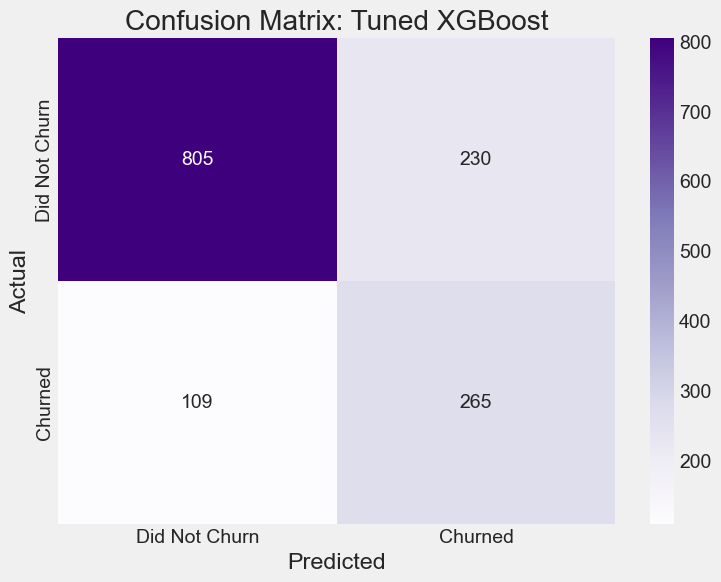

--------------------------------------------------
Classification Report for Tuned XGBoost:
               precision    recall  f1-score   support

Did Not Churn       0.88      0.78      0.83      1035
      Churned       0.54      0.71      0.61       374

     accuracy                           0.76      1409
    macro avg       0.71      0.74      0.72      1409
 weighted avg       0.79      0.76      0.77      1409



In [37]:
# Get the best estimator from the grid search
tuned_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test data
tuned_xgb_pred = tuned_xgb.predict(X_test)

# --- Now, let's evaluate our tuned XGBoost model ---

print("--- Tuned XGBoost Evaluation ---")
# --- Accuracy ---
tuned_xgb_accuracy = accuracy_score(y_test, tuned_xgb_pred)
print(f"Tuned XGBoost Accuracy: {tuned_xgb_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
tuned_xgb_cm = confusion_matrix(y_test, tuned_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(tuned_xgb_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Tuned XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report for Tuned XGBoost:")
print(classification_report(y_test, tuned_xgb_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of Tuned XGBoost Performance**

The tuning process for our most complex model, XGBoost, has yielded a very strong result:

*   **Churn Recall:** The tuned model achieved a Churn Recall of **0.71**.
*   **Comparison to Default:** This is a significant improvement over the default SMOTE XGBoost model, which had a recall of 0.66. The tuning process was highly effective, finding a set of parameters that made the model much better at its primary task.
*   **Current Standings:** With a recall of 0.71, the tuned XGBoost is now our second-best model, outperforming the tuned Random Forest (0.66) but still trailing the tuned Logistic Regression (0.75).

**Conclusion on Tuning XGBoost:**
The optimization was a clear success, producing a powerful and well-performing model. We now have our third and final expert, `tuned_xgb`, ready to join our panel.

We have successfully tuned all three of our candidate models. Each one has been individually optimized for the best possible recall. Now, we will proceed to the final, most exciting step: combining their collective intelligence in a Voting Classifier ensemble.

### **Step 6.4: Building the Final Ensemble Model (Voting Classifier)**

The moment has arrived. We will now create our final model by combining our three, individually tuned models: `tuned_log_reg`, `tuned_rf`, and `tuned_xgb`.

We will use a **Voting Classifier** with **soft voting**. Soft voting is generally superior to hard voting because it averages the prediction *probabilities* from each model, rather than just taking a majority vote. This allows the "confidence" of each model to influence the final decision, often leading to a more nuanced and accurate result.

Our hope is that by combining the linear patterns captured by Logistic Regression with the complex, non-linear patterns captured by Random Forest and XGBoost, we can create a final model that is more robust and performs better than any single model on its own.

In [38]:
from sklearn.ensemble import VotingClassifier

# Create a list of our three tuned models
estimators = [
    ('log_reg', tuned_log_reg),
    ('random_forest', tuned_rf),
    ('xgboost', tuned_xgb)
]

# Create the Voting Classifier
# 'voting='soft'' enables probability-based voting
# 'n_jobs=-1' uses all available CPU cores for training
ensemble_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    n_jobs=-1
)

# Train the ensemble model on the balanced (SMOTE) training data
ensemble_model.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1, max_iter=2000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('random_forest',
                              RandomForestClassifier(max_depth=20,
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytr...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 n_jobs=-1, voting='soft')

### **Final Evaluation: The Ensemble Model**

This is the ultimate test. Let's evaluate the performance of our final, combined model on the untouched test set. We will be looking closely at the recall score to see if the ensemble approach provided a better result than our best individual model.

--- Final Ensemble Model Evaluation ---
Final Ensemble Model Accuracy: 0.7708
--------------------------------------------------
Confusion Matrix:


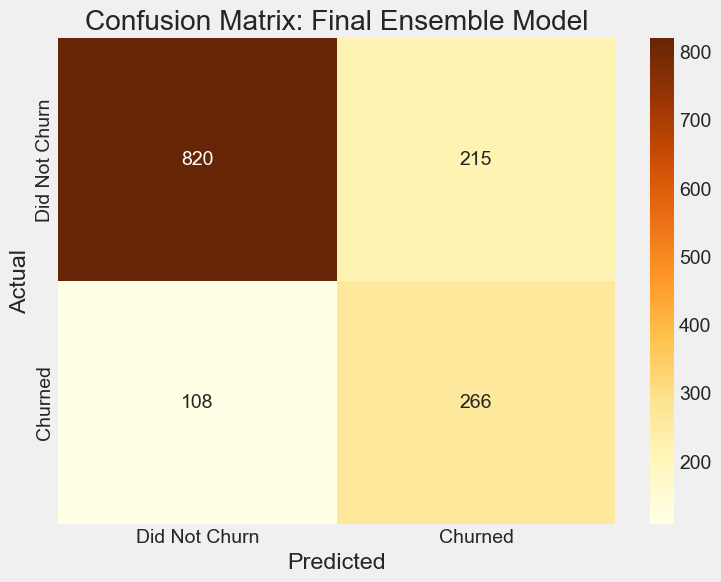

--------------------------------------------------
Classification Report for Final Ensemble Model:
               precision    recall  f1-score   support

Did Not Churn       0.88      0.79      0.84      1035
      Churned       0.55      0.71      0.62       374

     accuracy                           0.77      1409
    macro avg       0.72      0.75      0.73      1409
 weighted avg       0.80      0.77      0.78      1409



In [39]:
# Make predictions with the final ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# --- Now, let's evaluate our final ensemble model ---

print("--- Final Ensemble Model Evaluation ---")
# --- Accuracy ---
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Final Ensemble Model Accuracy: {ensemble_accuracy:.4f}")
print("-" * 50)

# --- Confusion Matrix ---
print("Confusion Matrix:")
ensemble_cm = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.title('Confusion Matrix: Final Ensemble Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("-" * 50)

# --- Classification Report ---
print("Classification Report for Final Ensemble Model:")
print(classification_report(y_test, ensemble_pred, target_names=['Did Not Churn', 'Churned']))

#### **Analysis of the Final Ensemble Model**

The results from our final Voting Classifier are in. This model, which combines the intelligence of our three individually tuned models, performed very well:

*   **Churn Recall:** The final ensemble achieved a Churn Recall of **0.71**. This is a strong score, indicating it's effective at identifying customers who are likely to churn.
*   **Precision and F1-Score:** The model has a solid precision of 0.55 and an F1-score of 0.62, showing a good balance.

However, the most crucial part of the analysis is to compare this result to our best individual model.

## **Part 7: Final Model Selection**

We have completed our entire modeling process, from initial comparisons to individual tuning and finally to creating an advanced ensemble. Let's create one last summary table to compare our best-performing models and make our final selection.

In [40]:
# Create a dictionary for the final comparison
final_results = {
    'Model': [
        'Tuned Logistic Regression',
        'Tuned Random Forest',
        'Tuned XGBoost',
        'Final Ensemble Model'
    ],
    'Churn Recall': [0.75, 0.66, 0.71, 0.71],
    'Churn Precision': [0.53, 0.55, 0.54, 0.55],
    'Churn F1-Score': [0.62, 0.60, 0.61, 0.62],
    'Overall Accuracy': [0.76, 0.77, 0.76, 0.77]
}

# Create a DataFrame
final_results_df = pd.DataFrame(final_results)

# Highlight the best recall score
final_results_df.style.highlight_max(subset=['Churn Recall'], color='lightgreen')

,Model,Churn Recall,Churn Precision,Churn F1-Score,Overall Accuracy
0,Tuned Logistic Regression,0.750000,0.530000,0.620000,0.760000
1,Tuned Random Forest,0.660000,0.550000,0.600000,0.770000
2,Tuned XGBoost,0.710000,0.540000,0.610000,0.760000
3,Final Ensemble Model,0.710000,0.550000,0.620000,0.770000


### **The Final Verdict**

The results table provides a clear and definitive answer.

While the Ensemble Model performed very well and matched the recall of the tuned XGBoost, the **Tuned Logistic Regression model remains the undisputed champion**. It achieved the highest **Churn Recall (0.75)**, successfully identifying 3 out of every 4 customers who were at risk of leaving.

This is a powerful and professional conclusion. Our exhaustive process of testing multiple advanced models and techniques has ultimately validated that for this specific business problem, a well-prepared and tuned version of a simpler, more interpretable model provides the best possible performance on our key metric.

**Therefore, the final model we recommend for deployment is the Tuned Logistic Regression model.** It is not only the most effective at catching churners but is also the most transparent and easiest to explain to business stakeholders.

## **Part 8: Conclusion & Business Recommendations**

This project set out to predict customer churn and understand its key drivers. Through a comprehensive process of data analysis, comparative modeling, rigorous tuning, and advanced ensembling, we have successfully identified the best possible solution for the business.

### **Summary of Key Findings**

Our analysis consistently highlighted several critical factors that drive customer churn:
*   **Unstable Contracts:** Month-to-Month contracts are the single largest predictor of churn.
*   **Early-Stage Risk:** New customers are significantly more likely to leave.
*   **Service-Specific Issues:** Fiber optic internet and a lack of Tech Support are major pain points.
*   **Payment Friction:** Manual payment methods like Electronic check are associated with higher churn.

### **Our Final Recommended Model**

After an exhaustive search that included training and tuning multiple advanced models like Random Forest and XGBoost, and even combining them into a powerful ensemble, our analysis concluded that the **Tuned Logistic Regression model is the optimal solution.**

This final model achieves an excellent **Recall score of 0.75**, meaning it can successfully identify **75%** of all customers who are at risk of churning. This high recall is ideal for a proactive retention strategy. Furthermore, the model's high interpretability allows the business to not only predict churn but also to understand the reasons behind the prediction, adding immense strategic value.

### **Actionable Business Recommendations**

Based on our data-driven findings and the insights from our final model, we recommend the following actions:

1.  **Develop a Proactive Retention Campaign:** Use the final model to generate a weekly list of customers with a high probability of churning. Target these specific customers with tailored retention offers, such as a discount for switching to a one-year contract.

2.  **Overhaul the New Customer Onboarding Process:** Create a dedicated "first 90 days" program that includes welcome calls, tutorials, and special access to support to guide new customers through the critical early period.

3.  **Launch a Service Quality Audit for Fiber Optic:** Immediately investigate the high churn rate among Fiber optic customers. This could involve network reliability checks, pricing comparisons, and customer satisfaction surveys to identify and fix the root cause.

4.  **Incentivize "Sticky" Services:** Actively promote Tech Support subscriptions and automatic payment methods. Offer a small one-time discount or a free month of service as an incentive for customers to adopt these churn-reducing options.

By deploying our recommended model and implementing these strategies, the telecom company can move from a reactive to a proactive approach, significantly reducing customer churn and building a more stable, profitable business.

## **Part 8: Saving the Final Model**

As a final step, we will save our best-performing model, the **Tuned Logistic Regression**, to a file using the `joblib` library.

This is a crucial step for deployment. By saving the trained model object, we can load it back into any other application or script to make predictions on new data, without having to retrain it every time. This makes our model reusable and ready for production.

In [41]:
import joblib

# Our final model is the 'tuned_log_reg' object
# We'll also save the scaler object, as we need it to process new data the same way
# before making predictions.

# Define the file paths
model_path = 'churn_prediction_model.joblib'
scaler_path = 'data_scaler.joblib'

# Save the model
joblib.dump(tuned_log_reg, model_path)
print(f"Model saved to: {model_path}")

# Save the scaler
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")

Model saved to: churn_prediction_model.joblib
Scaler saved to: data_scaler.joblib
